# OCR Tutorial - GhentCDH

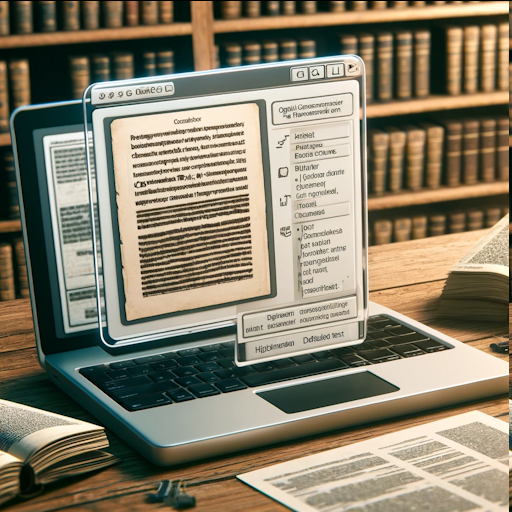

*Image created by OpenAI's DALL-E - 18/04/2024.*




# 1) Introduction

<p align="justify"> Optical Character Recognition, more commonly known as OCR, is a technology which enables computers to transform images of text to usable text. It is an extremly useful tool which can accelerate a variety of tasks within the Humanities. Do you need to translate text from a 19th centry book? Do you want to analyse language use by a dutch author? Do you simply want to edit a scanned document? OCR will always be the first step.

<p align="justify"> The purpose of this tutorial is to familiarize you with the OCR process and on how to increase the quality of its results. We will be doing that using <a href=https://https://github.com/tesseract-ocr/tesseract>Tesseract-OCR</a>, a powerfull open-source engine. Every step will be comprehensively explained, so that even for total beginners everything will make sense.

### 1.1) What is OCR and how does it work?
<p align="justify"> Without getting to technical, OCR is the process transforming text on an image to text that can be used on a computer, the same type of text that you are reading right now. It does so by looking at an image and recognizing patterns. To simplify: for humans it is clear that the capital letter <b>T</b> exists out of a shorter horizontal line and a longer vertical line. We know that every capital letter is written like that, it is a pattern consisting of features. We also know that the letter <b>N</b> consists out of different features and is therefore a different character.

<p align="justify"> Recognizing features of different characters is the principle behind OCR  technolgy. The difference with humans is that it does so on such an abstract level that we don't know what features it looks for exactly (the concept of the 'black box'). Every pixel of an image is investigated, and based on that the program/engine calculates a probability that a certain combination of features is a certain letter. This also means that OCR is never perfect, just like how humans sometimes make errors while transcribing.

### 1.2) The difference between OCR and HTR
<p align="justify"> In this tutorial we'll be focusing on OCR and printed text. However, more common in the historical context are handwritten documents. Using a 'plain' version of Tesseract-OCR, or any OCR-engine for that matter, will unfortunatly not work on this type of text. The variations in style and size of characters within the same paragraph and even sentence confuses these models.

<p align="justify"> A much more recent technology (OCR dates from the 1930's) that tackles this problem is HTR, or handwritten text recognition. Instead of looking at individual characters, this technology looks at a line of text and tries to decipher the words based on the features of the line. Since handwriting differs so much from source to source, a much more hands on approach is required to make use of this technology. In other words, if you have a very specific source with special handwriting you might need to teach the program/engine on how to accomodate these particular differences (this is called transfer-learning). The popular service <a href=https://www.transkribus.org/>Transkribus</a> includes this technology, and the ability to transfer-learn, on their platform.

### 1.3) Some concepts and how to use this notebook
<p align="justify"> Before starting this tutorial, this section will explain some basic concepts and how to use this notebook. Let's start at the beginning.

<p align="justify"> <b>What is a notebook?</b> A notebook is the current environment you are in and enables programming and text documention within the same file. It is therefore ideal for tutorials. This notebook runs on the Google Colab servers, which enables the use of powerfull computers to run our code. We won't need this power right now, but for more intensive workloads this is an accesible way of doing it.

<p align="justify"> Code can be run by pressing the small 'play' button on the left of the code block. This line of code will simply show a line of text. It can be anything, as long as it is written between quotation marks. Let's try this out!

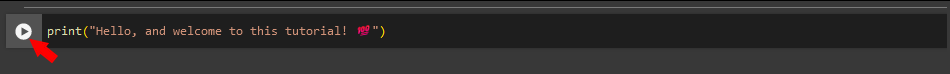

In [ ]:
print("Hello, and welcome to this tutorial! 💯")

<p align="justify"> When finished, the text will show up underneath the code block and a green checkmark will appear next to it, indicating that the code has been succefully run. A number also appears where the play button used to be. It displays where in the sequence this code block was run. Sometimes it will be important to follow a certain sequence. Checking the numbers next to the code block is an easy way to verify the sequence when something goes wrong. Rule of thumb: always run code from top to bottom. Hovering over the code block will make the play button reappear, so you can run the code block again.

<p align="justify"> <b>What is Python?</b> Python is the programming language in which the code in this notebook has been written. There are plenty of other programming languages, such as Java, C++, C# and so on. You do **not** have to be a programmer to understand Python code, in fact Python is one of the most easiest programming languages to understand. In this tutorial, no programming will be required. However, understanding what is happening often helps in quickly adressing new challenges with different source material.

<p align="justify"> <b>What is CLI?</b> Interacting with Tesseract-OCR happends through the command line interface, short for CLI. It looks a bit different than the Python code, but essentialy performs the same. You can recognize the CLI code by the exclamation point as the first character in a code block.

In [ ]:
!echo "Hi again! 🦩"

⚠️ Before we begin, we first need to make a copy of this notebook file to your own Google Drive.⚠️



Currently, you are working in the master file of this tutorial. To avoid overwriting this document, you will need to save a copy of this notebook in your own Google Drive folder. This is quite easy. Just press 'file' and 'Save a copy in Drive'. A new tab should open, or if not simply click 'open in new tab'. Now you can work safely! And if ever something goes wrong, just copy this file again and start anew.

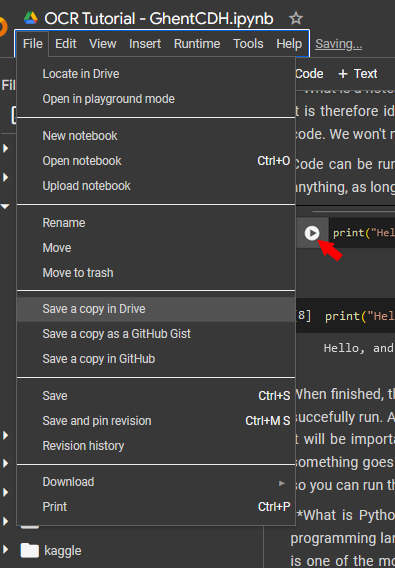

# 2) Data loading
<p align=justify> Before we can do anything, we need to load our data. Tesseract-OCR uses images as input type. However, a lot of scanned documents (like books for example) are in PDF format. This notebook wil therefore also include code that converts a PDF to images and back.


### 2.1) Example data
<p align="justify">Throughout this tutorial, we are going to make use of three examples. One is an image of a single page coming out of the <a href='https://github.com/VincentDucatteeuw/Ghent-Gazetteer'><i>Ghent Gazetteer Project</i></a>. This specific page is a list of Dutch streetnames. The second example is a rough scan of an article from the Walloon paper Le Soir titled <i>Le DNS Belge le plus libre et moins cher</i>, talking about the arrival of the '.be' domain in Belgium. And lastly, we will make use of a document containing an early 1990's article discussing <a href='https://www.jstor.org/stable/419444?searchText=Optical+Character+recognition&searchUri=%2Faction%2FdoBasicSearch%3FQuery%3DOptical%2BCharacter%2Brecognition%26so%3Drel&ab_segments=0%2Fbasic_search_gsv2%2Fcontrol&refreqid=fastly-default%3A362fe4004684b026d322a26ac54eba40'><i>Optical Character Recognition</i></a>.

These examples were chosen for several reasons. Firstly, they differ in language. Secondly, they vary in file format. And thirdly they have different features. The example data can be downloaded <a href='https://drive.google.com/drive/folders/1iuhvx33eN3GoYXveynYVMEA6yfR_YxNt?usp=sharing'>here.</a>

Ofcourse, this data can be interchanged by your own data!
  

### 2.2) Uploading files in Google Colab
<p align="justify">Once the files are downloaded on your personal computer, we need to upload them on our Colab space. There are different ways of doing this: for example it is possible to link your Google Drive to the Colab space, so that you can directly access all your files. This is recommended for larger projects.

First, let's make the connnection between Google Drive and Goole Colab. You might need to allow the service to acces your Drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

On the left side of the screen, press on the folder icon.

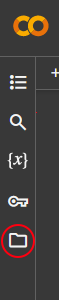

Click on the 'drive' folder, followed by the 'MyDrive' folder. Here you should find the contents of your drive.

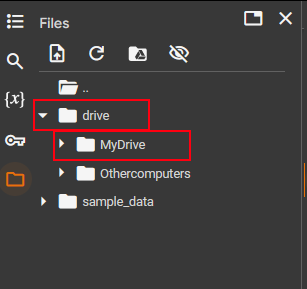

<p align="justify">For this tutorial, we will simply upload our examples directly in the Colab space. This is easier, but has the disadavantage that once you close your Colab space all the files are removed. This is because Google stores your files at 'runtime', so only when the notebook is being run.

Press the Folder tab again if it has closed.

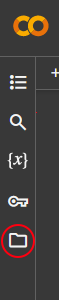

Then, press the upload icon to upload your files.

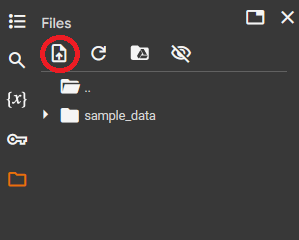

Once you select an image or PDF, a warning screen and a loading screen will appear.

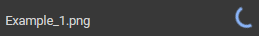

On completion, your files should look like this! ⬇️

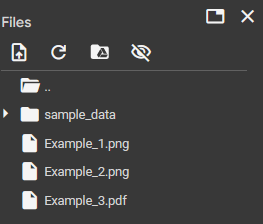

### 2.2) Loading an image
<p align='justify'>Luckily, loading an image is very easy. We only need the location (=path) of that file. If we assume the location is on Google Drive we can then navigate in our 'Files' tab to the correct image. Hover over an image (e.g. image.jpeg) and press right click. Then select 'Copy path'.

To actually load the image, paste the path in between the quotation marks in the code block below. Then press the code block. The location is now stored in the 'image' variable.

In [ ]:
image_1 = "/content/Example_1.png"
image_2 = "/content/Example_2.png"

### 2.3) Loading a PDF
Loading a PDF is a bit more complicated, since we need to deconstruct it into images that Tesseract-OCR can process. Instead of the image location, we will need the location of the PDF file. Paste the location of the PDF in the code block below. Make sure to run it!

In [ ]:
pdf_path = "/content/Example_3.pdf"

<p align="justify">The actual deconstruction of the PDF file happens in this code block below. The first part consists out of installing the required packages needed for working with PDF's and images. A package is like a book with a lot of code, we just refer to the location (like a page number) where the code is in stored the package, instead of rewriting everything ourself. Then we create a folder where we can store the images in (you can find it in the 'Files' tab) to lastly create an image from every page in the PDF.

In [ ]:
# These are the packages
print("🚨 Installing... 🚨")
!apt-get -qq install poppler-utils
!pip install pdf2image -q

# Here we import the packages in our notebook, so that we can use them. Note that we have not installed 'os', that's because it is included in Python.
import os
from PIL import Image
from pdf2image import convert_from_bytes, convert_from_path

# This is the function that deconstructs the PDF. There is an output location 'out' and the images are of the type .png (fmt="png").

def pdf_deconstructor(path):
    out = "/content/pdf"
    # Here, the function checks if our output folder exists. If not the function creates it.
    if not os.path.isdir(out):
        os.mkdir(out)
    print("ℹ️ Deconstructing the PDF. This can take a while...")
    try:
      images = convert_from_bytes(open(path, 'rb').read(), output_folder=out, fmt="png")
    except:
      images = convert_from_path(pdf_path, output_folder=out, fmt="png")
    print("✅ Succesfully deconstructed the PDF. Check the 'pdf' folder in 'Files' ✅")


# Here, we actually try and call the function and run it with our pdf_path.
try:
  pdf_deconstructor(pdf_path)
except NameError as e:
  print("❌ The previous code block was not run! ❌")
except IOError as e:
  print("❌ The PDF was not be found because the location is incorrect or does not exist! ❌")

Let's take at our images from and a random page extracted from our PDF.

In [ ]:
# Importing the required packages
from IPython.display import Image, display

# Images
print("Image 1 📸!\n")
display(Image(filename=image_1))
print("")

print("Image 2 📸!\n")
display(Image(filename=image_2))
print("")

# PDF Image
print("\nRandom image from the PDF 📸!\n")
j = 0
for i in os.listdir("/content/pdf/"):
  j += 1
  pdf_image = os.path.join("/content/pdf/", i)
  if j == 4:
    display(Image(filename=pdf_image))
    break

# 3) Preprocessing

<p align="justify">To increase the accuracy of our results, we want the text to be as clear as possible. That's why we need to edit our images to increase the clarity of the letters, so that they can be picked up (=processed) more easily. This is what we call 'preprocessing the image'. There are lot's of different methods and programs which can manipulate images (e.g. example PhotoShop or Paint.net). We will be using Python to accomplish this.

These manipulations are actually just mathematical operations performed on the image. Different operations result in different results.

The first operation is transforming our colored image to a grayscale one. This is the first step in changing our image to a white background and black letters.

In [ ]:
# Some more packages
!pip install opencv-python -q
# Importing the packages
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

# The function to convert to grayscale
def get_grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_1 = Image.fromarray(get_grayscale(cv.imread(image_1)))
image_2 = Image.fromarray(get_grayscale(cv.imread(image_2)))
pdf_image_ = Image.fromarray(get_grayscale(cv.imread(pdf_image)))

print("Image 1 📸!\n")
display(image_1)
print("Image 2 📸!\n")
display(image_2)
print("\nFirst image from the PDF 📸!\n")
display(pdf_image_)

<p align="justify">The next few code blocks do some other image manipulations. Since this is just a showcase, we'll be experimenting with our images. Just try out the code blocks and see what happens. There is no need to understand what is happening inside the code blocks. Remember, none of these operations are a necessity when performing OCR.

In the code block below, you can choose image 1 or 2 to test processing.



In [ ]:
# Here, you can choose which image to process
image_n = image_1

Below is a list of every operation, explaining what it does.

1.   **Thresholding**: we want our characters to be as clear as possible. That is why we'll use thresholding to change our image to only white and black pixels, nothing in between. Then, we'll change the threshold to decide how many of the pixels should be white/black. This is how we can increase the visibilty of charachters.

In [ ]:
# Thresholding
import ipywidgets as widgets
import numpy as np
from IPython.display import clear_output

# Here, we create the slider at the bottom
print("ℹ️ Change the slider to increase/decrease the amount of black pixels.")
slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='Threshold:', continuous_update=False)

# This is the function that does the thresholding
def thresholding(image, threshold):
  return cv.threshold(image, threshold, 250, cv.THRESH_BINARY)[1]

# This is the function that updates the image when the slider is changed
def update_image(change):
    clear_output(wait=True)
    print("ℹ️ Move the slider to increase/decrease the amount of black pixels.")
    display(slider)
    new_threshold = change['new']
    thresh_image = thresholding(np.array(image_n), new_threshold)
    display_image = Image.fromarray(thresh_image)
    display(display_image)

slider.observe(update_image, names='value')
display(slider)

2.  <p align="justify"><b>Denoising</b>: Blurring the image can increase the quality of your sample. This might seem counter intuitive, but by blurring the image we remove noise which could confuse our OCR program/engine. This is done by a mathematical calculation called a <a href='https://en.wikipedia.org/wiki/Kernel_(image_processing)'>kernel convolution</a>. You don't have to understand this, the only thing that you need to remember is that (as you will see in the demo) only odd numbers can be used for denoising.

In [ ]:
# Denoising
# Here, we create the slider at the bottom
print("ℹ️ Move the slider to increase/decrease the blur.")
slider = widgets.IntSlider(value=1, min=1, max=15, step=2, description='Blur:', continuous_update=False)

# This is the function that does the blurring
def blur(image, blur):
  return cv.medianBlur(image, blur)

# This is the function that updates the image when the slider is changed
def update_image(change):
    clear_output(wait=True)
    print("ℹ️ Move the slider to increase/decrease the amount of blur.")
    print("⚠️ Blurring might take some time.")
    display(slider)
    new_threshold = change['new']
    thresh_image = blur(np.array(image_n), new_threshold)
    display_image = Image.fromarray(thresh_image)
    display(display_image)

slider.observe(update_image, names='value')
display(slider)

3. <p align="justify"><b>CLAHE</b>: <a href="https://en.wikipedia.org/wiki/Adaptive_histogram_equalization">Contrast Limited Adaptive Histogram equalization</a> is method of increasing contrast in images. This is mostly usefull when encountering lower quality scans of images that contain bright and dark zones. Depending on the quality of your image, the changes could be as massive as they can be small.

In [ ]:
# CLAHE
# This is the function that applies CLAHE
def clahe(image):
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
  return clahe.apply(np.array(image))
display(Image.fromarray(clahe(image_n)))


4. **Rotating**: A final method of preprocessing we'll discuss here is rotation. Using this method, we try to straighten our image and characters.

In [ ]:
# Rotate
!pip install imutils -q
# Import packages
import imutils
# Here, we create the slider at the bottom
print("ℹ️ Change the slider to rotate the image.")
slider = widgets.IntSlider(value=0, min=-15, max=15, step=1, description='Rotation:', continuous_update=False)

# This is a function that rotates the image
def rotate(image, angle):
    return imutils.rotate_bound(image, angle)
# This is the function that updates the image when the slider is changed
def update_image(change):
    clear_output(wait=True)
    print("ℹ️ Change the slider to rotate the image.")
    display(slider)
    new_rotation = change['new']
    rotate_image = rotate(np.array(image_n), new_rotation)
    display_image = Image.fromarray(rotate_image)
    display(display_image)

slider.observe(update_image, names='value')
display(slider)

This code block loads some predefined preprocessing tailored to the example data which we will then use in the OCR process. Not all images require preprocessing. For example, the PDF file is already in optimal condition.

In [ ]:
# Reloading the images
image_1 = cv.imread("/content/Example_1.png")
image_2 = cv.imread("/content/Example_2.png")

# Grayscale
image_1 = get_grayscale(image_1)
image_2 = get_grayscale(image_2)

# Threshold
image_1 = thresholding(image_1, 160)
image_2 = thresholding(image_2, 230)

# Rotation
image_1 = rotate(image_1, 0.5)
image_2 = rotate(image_2, -1)

display(Image.fromarray(image_1))
display(Image.fromarray(image_2))

# 4) OCR
Finally, we can apply the OCR-detection method on our data. The detection will be done on the images and PDF seperatly. However, we first need to install the required program.

### 4.1) Installation
Here, we install the Tesseract-OCR software and the Python wrapper pytesseract. A wrapper can be seen as the translator between two languages, in this case Python and CLI.

In [ ]:
print("🚨 Installing... 🚨")
!sudo apt-get -qq install tesseract-ocr
!pip install pytesseract -q
print("✅ Installation done ✅")

<p align='justify'>Languages use different scripts and characters in their text. This means that there is not one big model that can handle all the languages at once. Therefor, we need to download the specific models that we want. A full list of languages can be found <a href='https://tesseract-ocr.github.io/tessdoc/Data-Files#data-files-for-version-400-november-29-2016'>here</a>. For our purpose we will install Dutch and French, since English is already preinstalled. We will need to move the trainingdata in the correct folder, that is done in the codeblock below.

In [ ]:
# This command downloads the traineddata
! wget https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/fra.traineddata -q
! wget https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/nld.traineddata -q
# This command moves the traineddata to the correct folder
! sudo mv "/content/fra.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"
! sudo mv "/content/nld.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

### 4.2) OCR on Images
<p align='justify'>Let's try it out. This code block just prints out the text that it has detected. Below we can choose the language and the image that we want to use. Tesseract also allows to combine multiple languages, if a text has multiple languages at once. Depending on the amount of text, detecting the text can take some time.

In [ ]:
# Import packages
import pytesseract

# Choose image
image_n = image_1

# Choose language: nld, fra or eng. Combine two languages by adding a '+' in between.
lang = 'nld'

# Tesseract
text = pytesseract.image_to_string(Image.fromarray(image_n), lang=lang)
print(text)

<p align='justify'>Sometimes, it might be usefull to visualize what Tesseract detects. Based on that, some preprocessing modifications can be made. The code block belows uses the Tesseract data to create a visualisation. The default settings of the visualisation are to show only the detections of which Tesseract is at least 40 percent sure. To show all boxes, set confidence to -1.

In [ ]:
confidence = 40

In [ ]:
from pytesseract import Output

def print_boxes(image,bbox):
    n_boxes = len(bbox['text'])
    for i in range(n_boxes):
        if int(bbox['conf'][i]) > confidence:
            (x, y, w, h) = (bbox['left'][i], bbox['top'][i], bbox['width'][i], bbox['height'][i])
            image = cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image
display(Image.fromarray(print_boxes(cv.cvtColor(image_n, cv.COLOR_GRAY2RGB), pytesseract.image_to_data(Image.fromarray(image_n), output_type=Output.DICT, lang=lang))))

We can also save our detected text as a .TXT file, so that we can download it later. You can find it in the files tab.

In [ ]:
# Here we create a file and write our detections to it.
with open('/content/output.txt', 'w') as file:
  file.writelines(text)
  file.close()

### 4.3) OCR on PDF
To perform OCR on a PDF, we need to go through every image of our deconstructed PDF. This is exactly the same principle as before, but we simply tell our code to go through our 'pdf' folder, instead of just one image.

There are two options on how to save our data.

First, we can simply save everything as a .TXT file. They can be found in the output folder after this code block is run.

In [ ]:
# Here we create the output folder
if not os.path.isdir("/content/output"):
  os.mkdir("/content/output")

# Here we go through every file in our PDF folder and perform OCR on it. We then save it in a TXT file in the output folder.
for file in os.listdir("/content/pdf"):
  text = pytesseract.image_to_string(os.path.join("/content/pdf/", file), lang=lang)
  with open(os.path.join("/content/output/", file.replace(".png", ".txt")), 'w') as f:
    f.writelines(text)
    f.close()
print(f"📝Succesfully created TXT files.📝")

It would be preferable for most applications to get a PDF again, where we can then copy our text. This is the purpose of the code block below.

In [ ]:
# Install packages
!pip install PyPDF2 -q
# Import packages
import os
from PIL import Image
import pytesseract
import PyPDF2
from io import BytesIO

# Create a function that combines all pages of a PDF file.
pdf_merger = PyPDF2.PdfMerger()

# Sort our pages
files = [f for f in os.listdir("/content/pdf") if f.lower().endswith(".png")]
files.sort()

# Go through all files in the PDF folder
for filename in files:
  image_path = os.path.join("/content/pdf", filename)
  try:
  # Perform OCR and get PDF page as bytes
    pdf_page = pytesseract.image_to_pdf_or_hocr(image_path, extension='pdf', lang='eng')
    pdf_reader = PyPDF2.PdfReader(BytesIO(pdf_page))
    pdf_merger.append(pdf_reader)
  except Exception as e:
    print(f"❌  Something went wrong: {e} ❌ ")

# Write all pages to a single PDF file
if pdf_merger.pages:
  pdf_merger.write("/content/output.pdf")
  pdf_merger.close()
  print(f"📁PDF successfully created!📁")

### 4.4) Advanced usage of Tesseract
<p align='justify'>Tesseract also includes some advanced parameters that can be changed to influence the result. We will not use this in this tutorial, but below is a short overview. All these parameters can be included in pytesseract, in a specific <a href='https://pypi.org/project/pytesseract/'>config</a> field.

Page Segmentation Mode: This determines how Tesseract-OCR treats the inputfile. Normally, Tesseract-OCR expects somthing like a book page, but by changing this parameter you can change what Tesseract-OCR expects. There are 14 modes in total. The default page segmentation mode is 3.

In [ ]:
!tesseract --help-psm

OCR Engine mode. Tesseract-OCR already went trough five big updates and some engine revisions. It is still possible to acces the old engines, but not recommended.

In [ ]:
!tesseract --help-oem

Lang: This last parameter just provides an overview of all installed languages. Normally, we should see the English, Dutch and French data.

*Note OSD is a model used to do orientation and script detection.

In [ ]:
!tesseract --list-langs

# 5) Downloading our files
To save our detections, we can simply go to a file and download it.

Click on the three dots and press the download button.

(1)

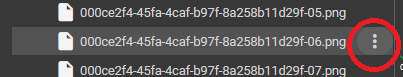

(2)

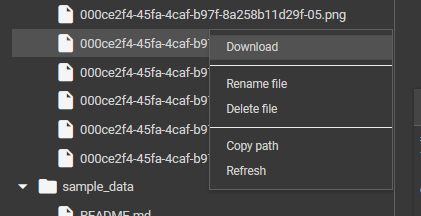

And that's the full OCR process! Now you posses all the knowledge necessary to perform your own OCR.

By Bas Vercruysse, 2024, https://www.ghentcdh.ugent.be/.
